In [16]:
!nvidia-smi

Sat May 20 08:59:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
%cd /content
import os

HOME = os.getcwd()
print(HOME)

/content
/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [18]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [19]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 81.1MB/s]

2023-05-19 10:00:29.921430: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 12.4MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 160.5ms
Speed: 0.7ms pre-process, 160.5ms inference, 229.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'/content/drive/MyDrive/YoloObjdetection/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100%|██████████| 104k/104k [00:00<00:00, 14.9MB/s]


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
%cd /content/drive/MyDrive/YoloObjdetection
!ls

/content/drive/MyDrive/YoloObjdetection
1816000-691354.jpg
3074890-group-of-sheep-resting-summer-environment-nature-photocase-stock-photo-large.jpeg
data
pexels-matthias-groeneveld-5359969-1280x720-24fps.mp4
runs
yolov5s.pt
YoloV8.ipynb
yolov8n.pt
Yolov8_object_detection_on_custom_dataset.ipynb
yolov8s.pt


In [21]:
%cd /content/drive/MyDrive/YoloObjdetection


!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25  plots=True

/content/drive/MyDrive/YoloObjdetection
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

In [55]:
!ls runs/detect/train/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1684573531.5547e4b95fbf.13989.0  train_batch2.jpg
F1_curve.png					     train_batch60.jpg
P_curve.png					     train_batch61.jpg
PR_curve.png					     train_batch62.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


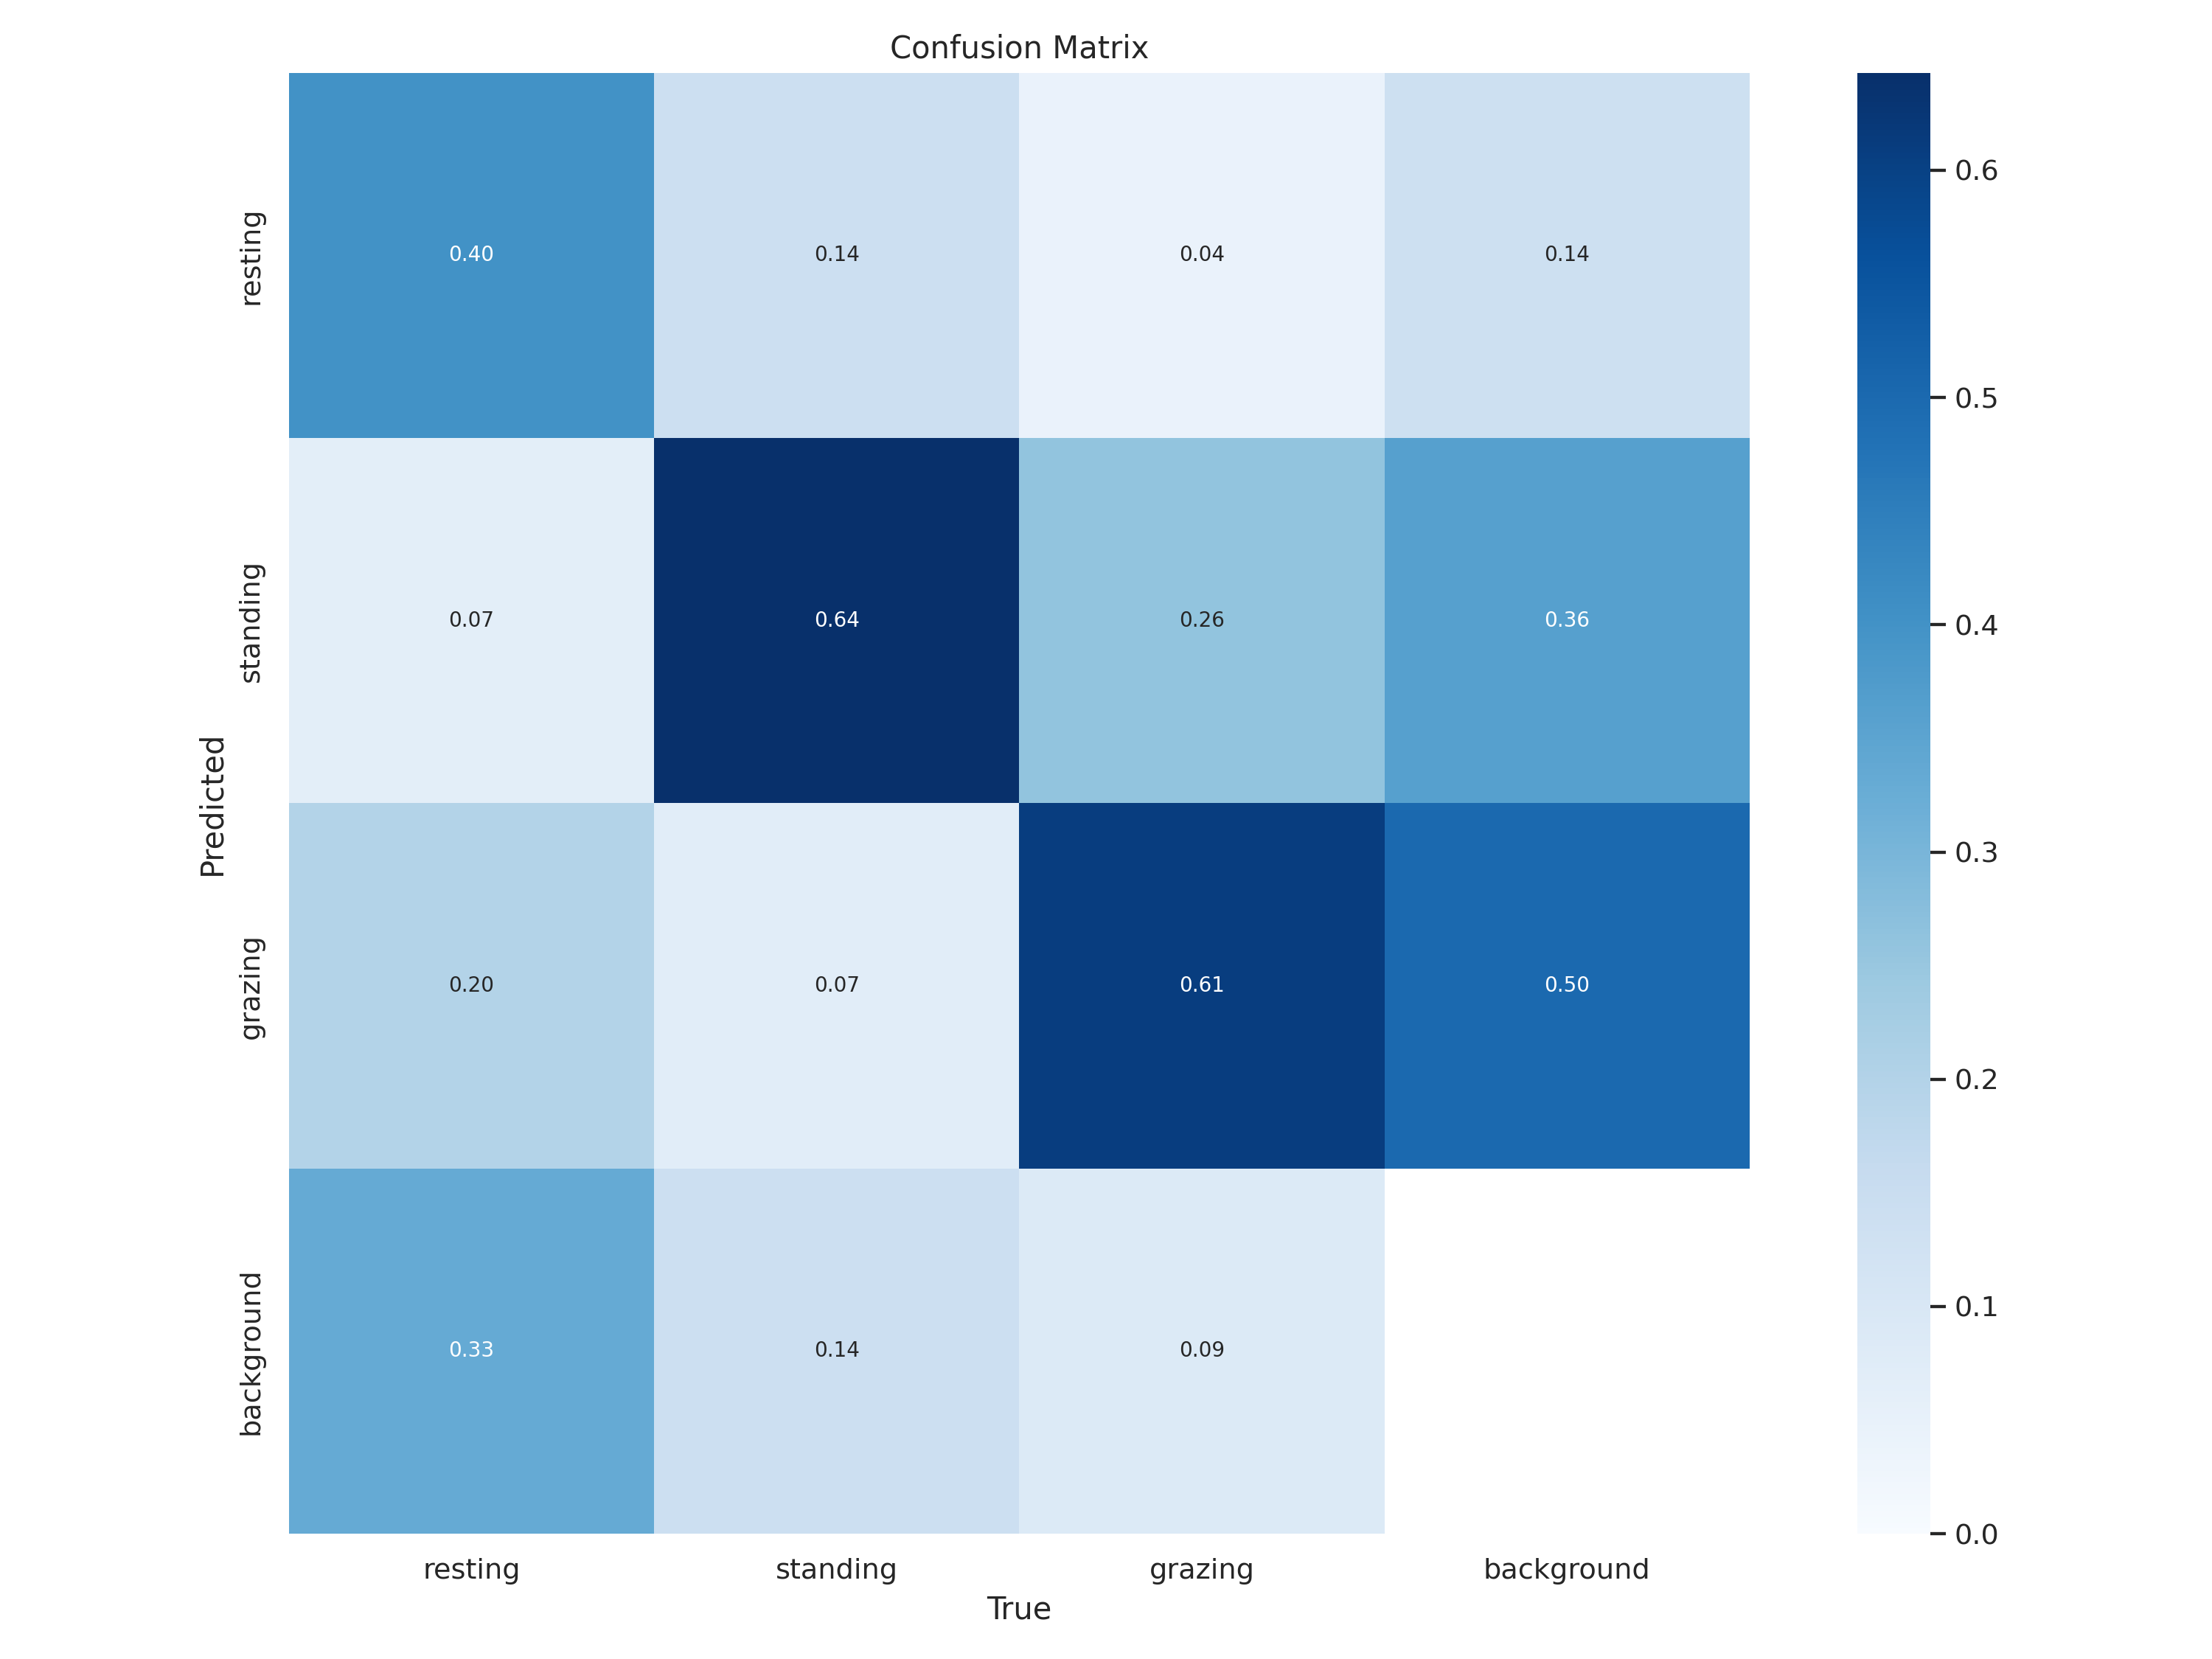

In [25]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

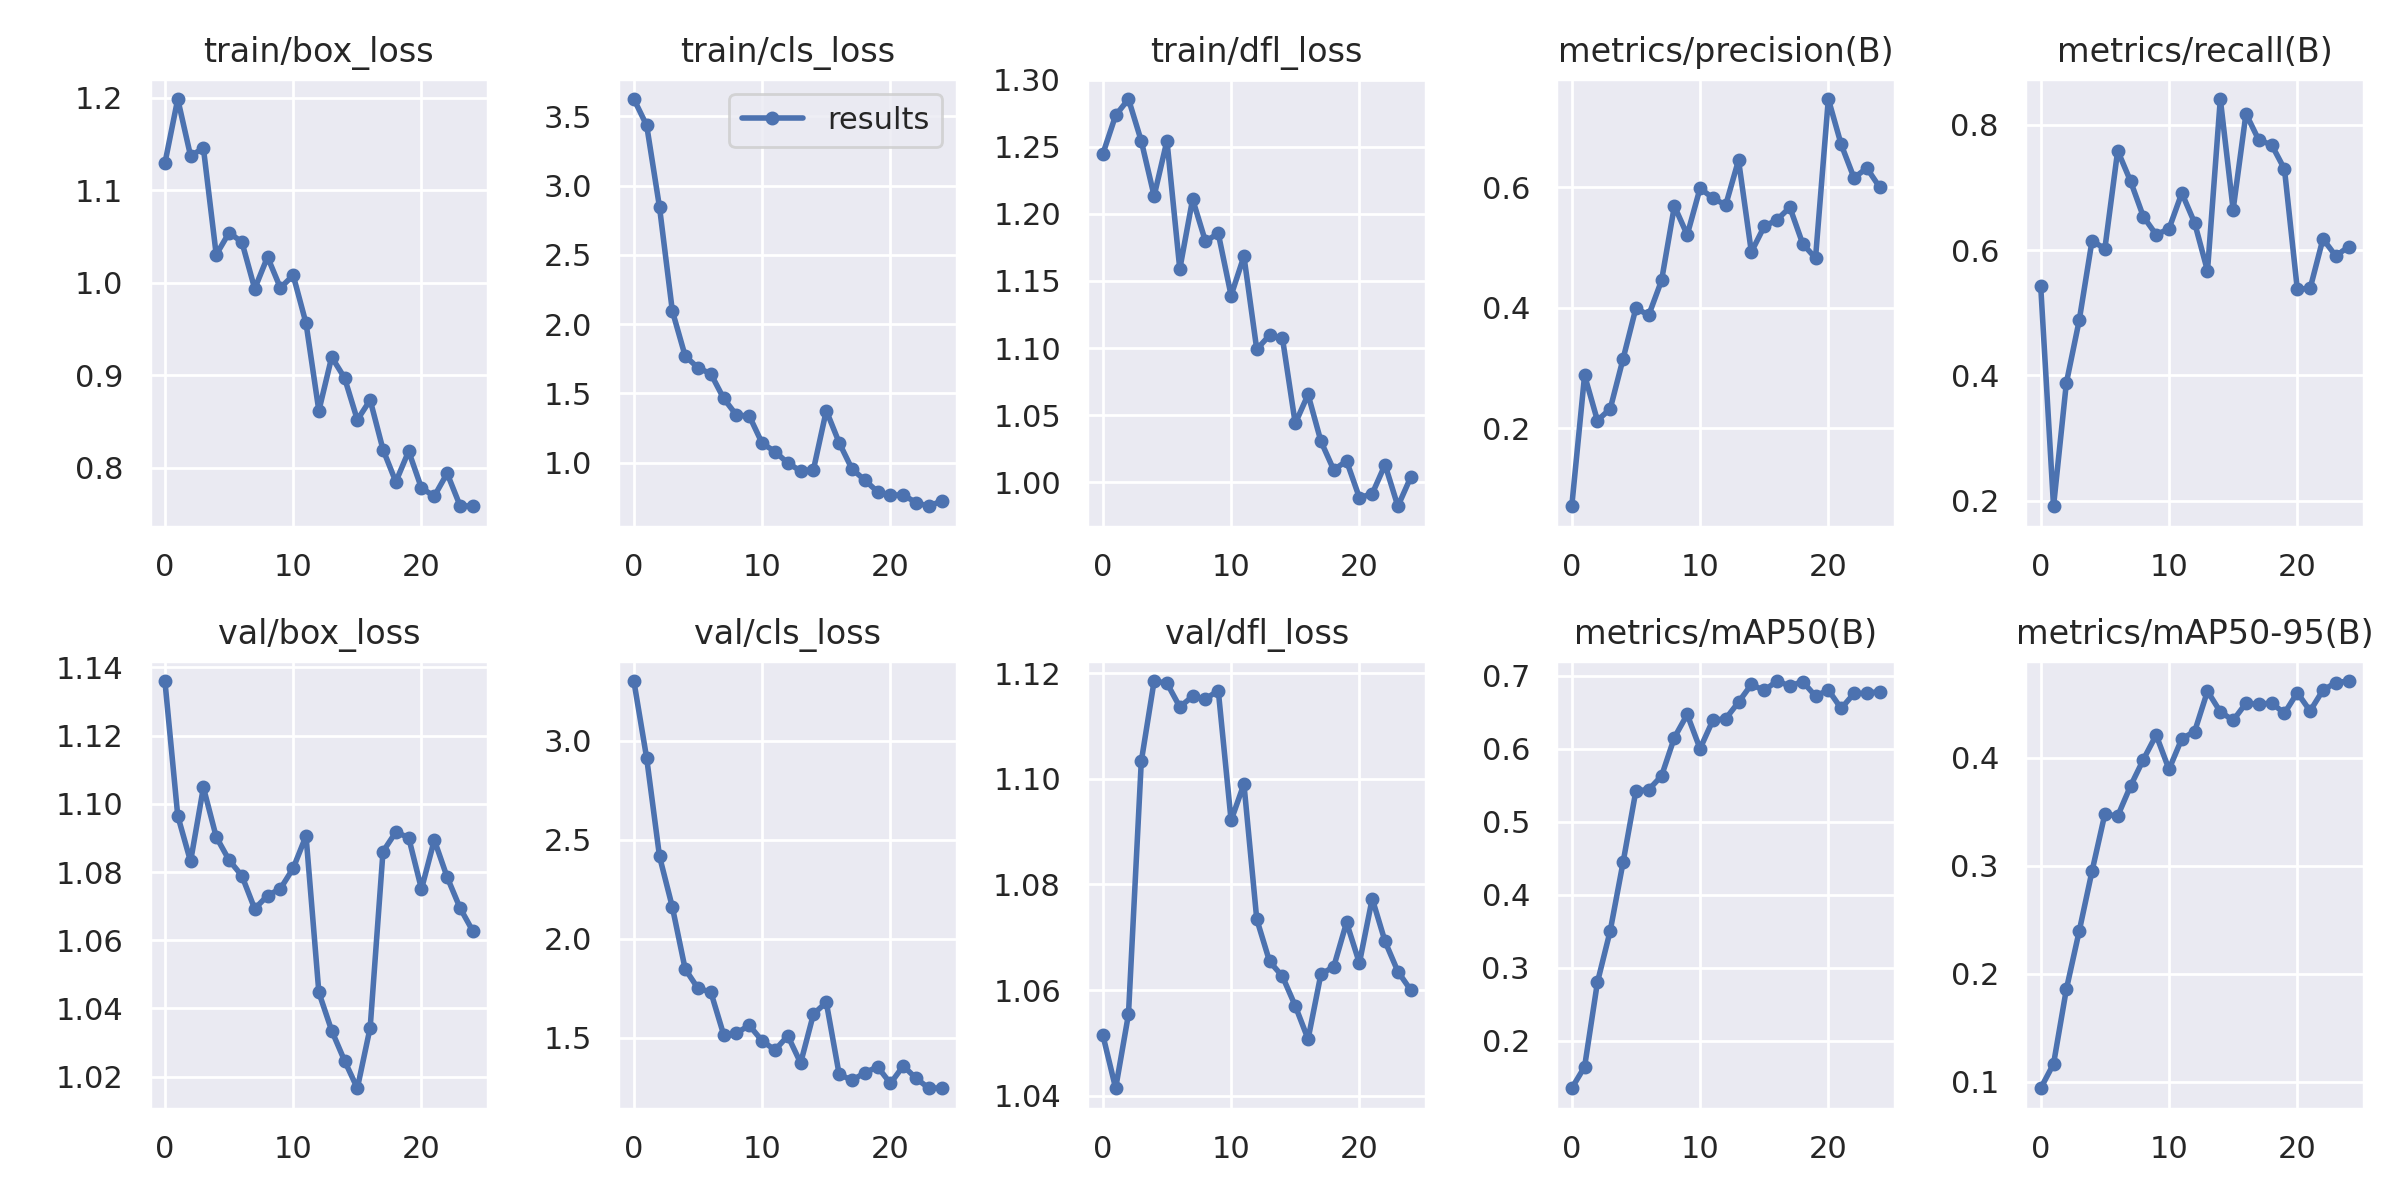

In [26]:
Image(filename='runs/detect/train/results.png', width=600)

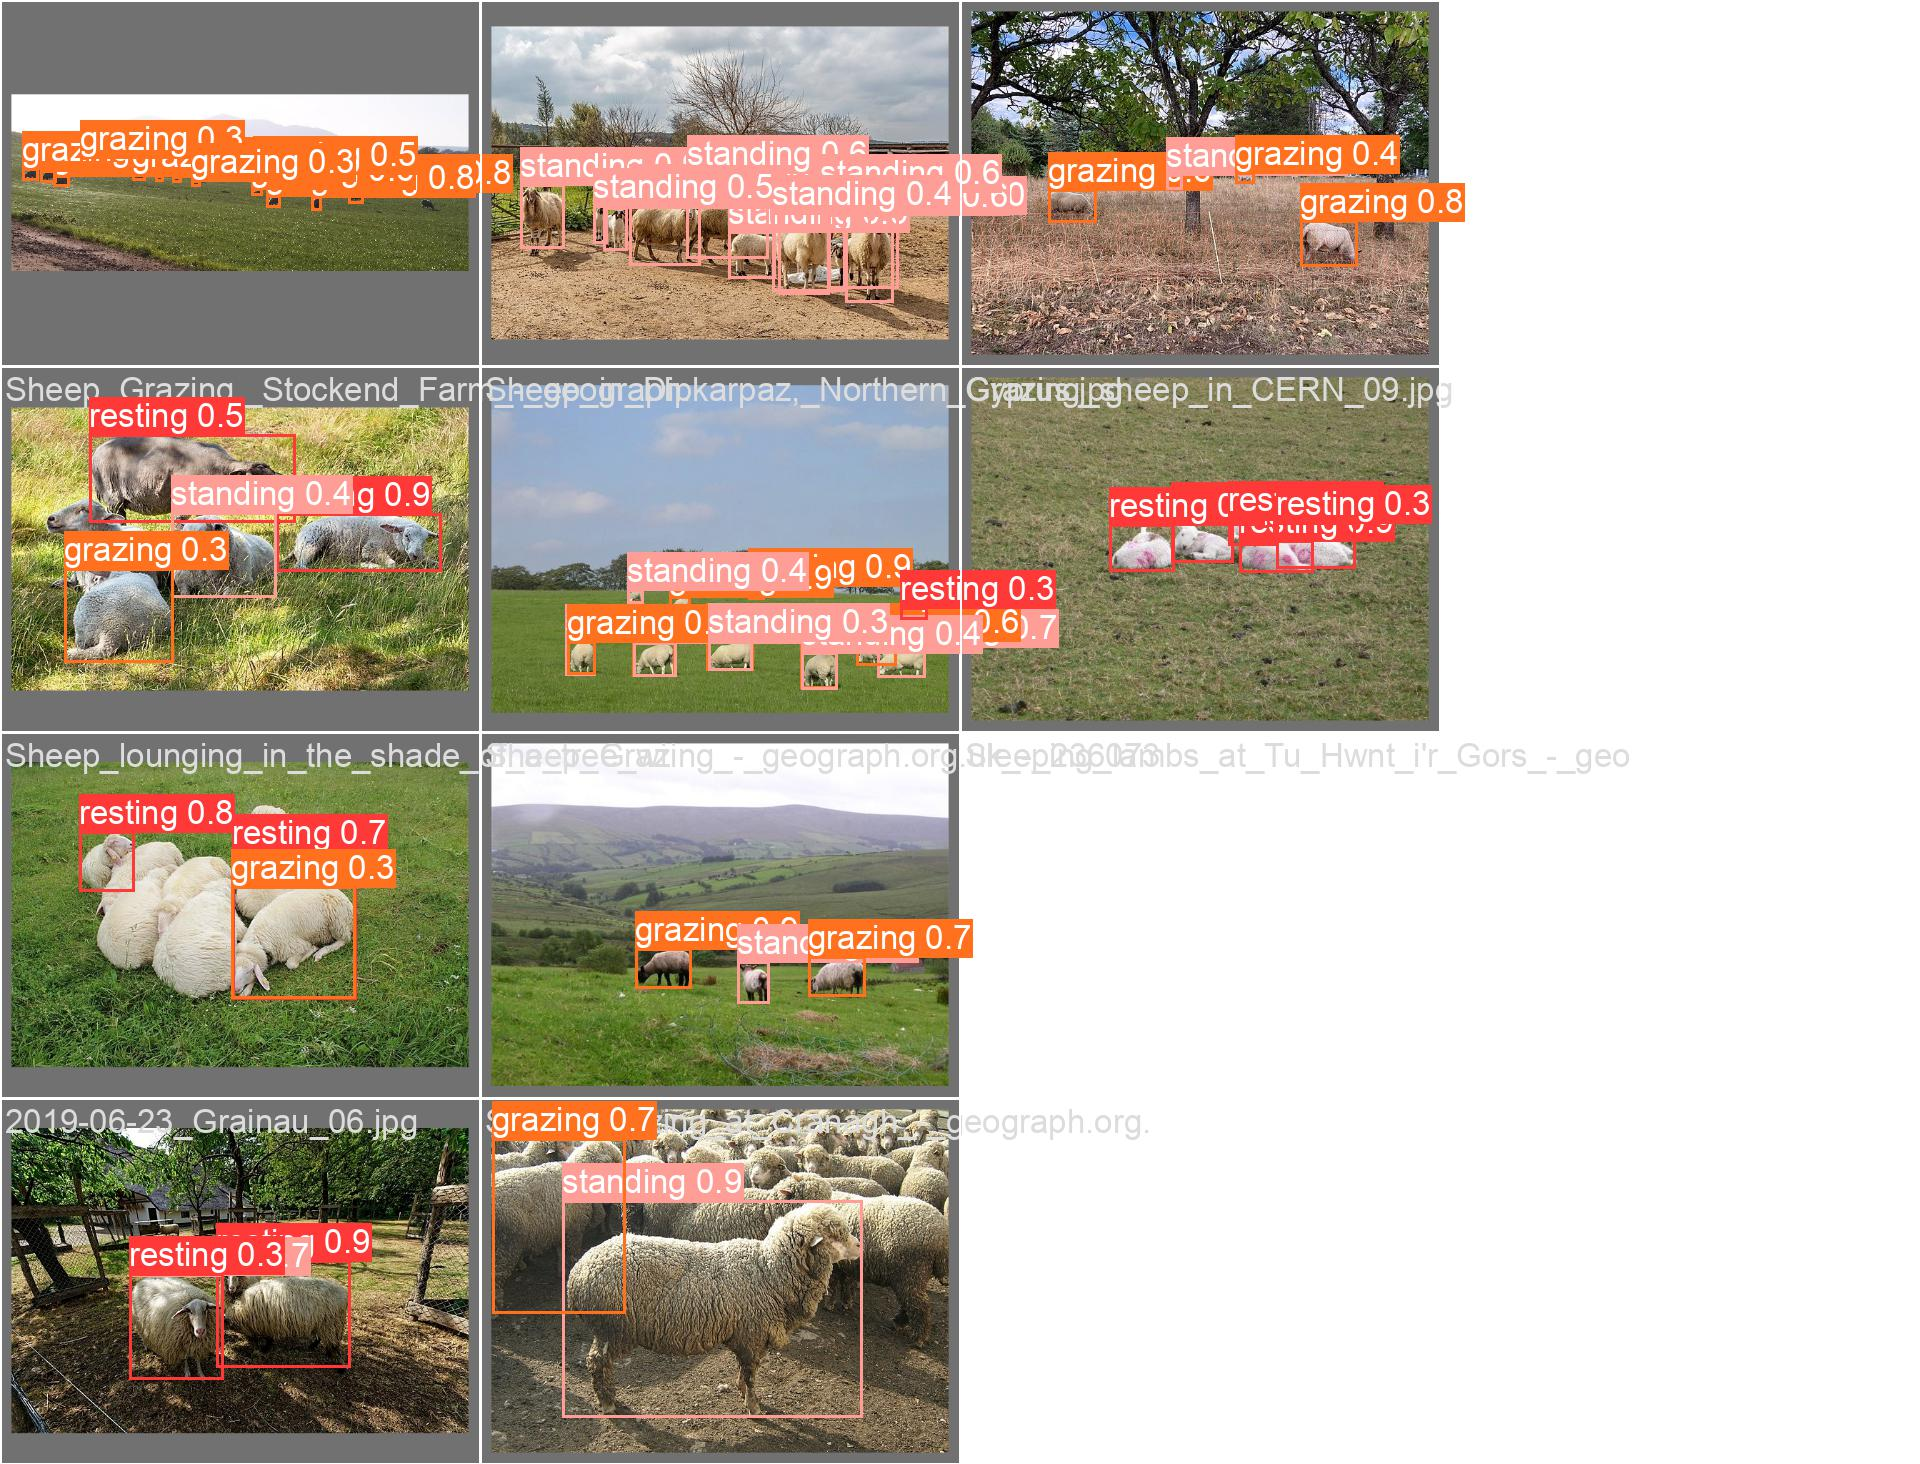

In [27]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [29]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2023-05-20 09:12:28.433091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 09:12:29.642775: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YoloObjdetection/data/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.87it/s]
                   all         10         52        0.6      0.605      0.679      0.471
               resting         10    

## Inference with Custom Model

In [57]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/YoloObjdetection/pexels-edie-reed-6291972-1280x720-25fps.mp4' save=true

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/550) /content/drive/MyDrive/YoloObjdetection/pexels-edie-reed-6291972-1280x720-25fps.mp4: 384x640 1 resting, 1 standing, 1 grazing, 60.4ms
video 1/1 (2/550) /content/drive/MyDrive/YoloObjdetection/pexels-edie-reed-6291972-1280x720-25fps.mp4: 384x640 1 resting, 1 standing, 1 grazing, 11.1ms
video 1/1 (3/550) /content/drive/MyDrive/YoloObjdetection/pexels-edie-reed-6291972-1280x720-25fps.mp4: 384x640 1 resting, 1 standing, 1 grazing, 11.0ms
video 1/1 (4/550) /content/drive/MyDrive/YoloObjdetection/pexels-edie-reed-6291972-1280x720-25fps.mp4: 384x640 1 resting, 1 standing, 1 grazing, 11.1ms
video 1/1 (5/550) /content/drive/MyDrive/YoloObjdetection/pexels-edie-reed-6291972-1280x720-25fps.mp4: 384x640 1 resting, 1 standing, 1 grazing, 11.0ms
video 1/1 (6/550) /content/drive/MyDrive/YoloObjdetection/pexels-edie-re

**NOTE:** Let's take a look at few results.

In [28]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")